<a href="https://colab.research.google.com/github/zaimahfira/Project/blob/main/Klasifikasi_Profit_Bisnis_Retail_Zaimah_Fira_Azzahra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Library

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve,classification_report
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings("ignore")

from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import  StandardScaler

## Load Data dan Ekplorasi Data

In [ ]:
#Import dataset
store = pd.read_csv('/content/Sample - Superstore.csv',encoding='cp1252')
store.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
#Menghitung total baris dan kolom dataset
store.shape

(9994, 21)

In [ ]:
#Menampilkan info tabel
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [ ]:
#Memeriksa nilai yang hilang
store.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [ ]:
#Mengecek duplikat kolom
store.duplicated().sum()

0

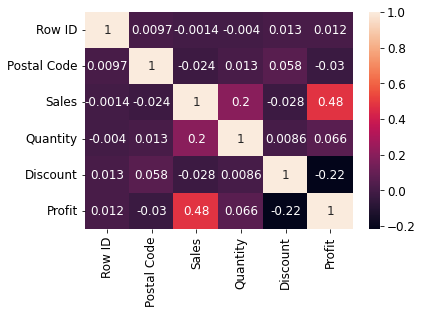

In [ ]:
#Menampilkan relasi kolom
sns.heatmap(store.corr(), annot =True)

In [ ]:
#Membuat conditional statement pada kolom profit
p = store['Profit'].values.astype('O')

for j in range(len(p)):
    if p[j] > 0:
        p[j] = 'Gain'
    elif p[j] < 0:
        p[j] = 'Loss'
    else:
        p[j] = 'Nil'

#### **Column Profit**

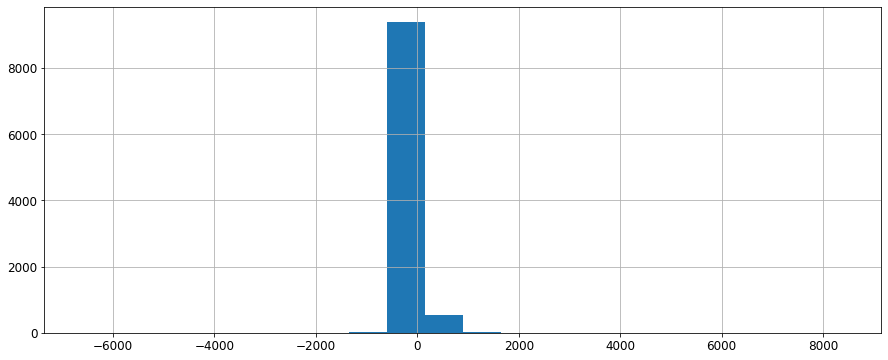

In [ ]:
#Menampilkan diagram jumlah pada kolom profit
n_bins = 20
plt.figure(figsize = (15, 6))
store['Profit'].hist(bins = n_bins)

In [ ]:
#Menampilkan Mean, Median, Maximum & Minimum kolom Profit
print("Mean Profit:", round(store['Profit'].mean()))

print("Median Profit:", round(store['Profit'].median()))

print("Highest Profit:", round(store['Profit'].max()))

print("Lowest Profit:", round(store['Profit'].min()))

Mean Profit: 29
Median Profit: 9
Highest Profit: 8400
Lowest Profit: -6600


In [ ]:
#Menampilkan 5 nilai tertinggi kolom profit
store['Profit'].sort_values(ascending = False)[:5]

6826    8399.9760
8153    6719.9808
4190    5039.9856
9039    4946.3700
4098    4630.4755
Name: Profit, dtype: float64

In [ ]:
#Menampilkan 5 nilai terendah kolom profit
store['Profit'].sort_values()[:5]

7772   -6599.9780
683    -3839.9904
9774   -3701.8928
3011   -3399.9800
4991   -2929.4845
Name: Profit, dtype: float64

#### **Menampilkan kolom yang termasuk Categorical**

In [ ]:
#mencari kolom yang termasuk categorical variabel

categorical = [var for var in store.columns if store[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 15 categorical variables

The categorical variables are :

 ['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name']


Text(0.5, 1.0, 'Category')

<Figure size 432x288 with 0 Axes>

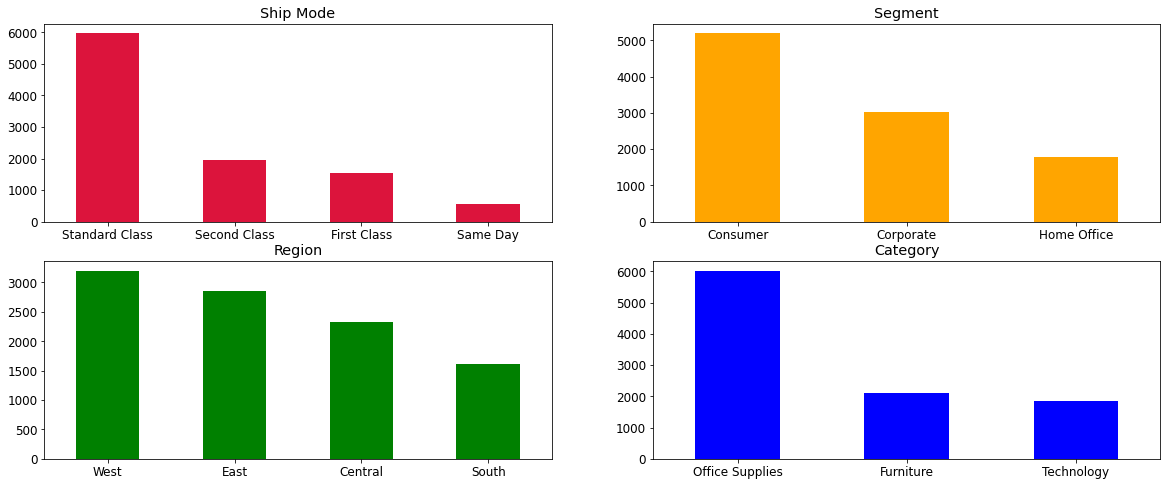

In [ ]:
plt.figure(1)
plt.figure(figsize=(20,8))
# Column (Ship Mode)
plt.subplot(221)
store['Ship Mode'].value_counts().plot(kind='bar',color='crimson',rot=0)
plt.title('Ship Mode')
# Column (Segment)
plt.subplot(222)
store['Segment'].value_counts().plot(kind='bar',color='orange',rot=0)
plt.title('Segment')
# Column (Region)
plt.subplot(223)
store['Region'].value_counts().plot(kind='bar',color='green',rot=0)
plt.title('Region')
# Column (Category)
plt.subplot(224)
store['Category'].value_counts().plot(kind='bar',color='blue',rot=0)
plt.title('Category')


**Plot di atas menggambarkan**
* Pengiriman melalui Kelas Standar paling banyak digunakan.
* Consumer paling banyak membeli produk
* Wilayah Barat memiliki lebih banyak Pelanggan daripada wilayah lain.
* Office Supplies adalah produk yang banyak dipesan.

Text(0.5, 1.0, 'Sub-Category')

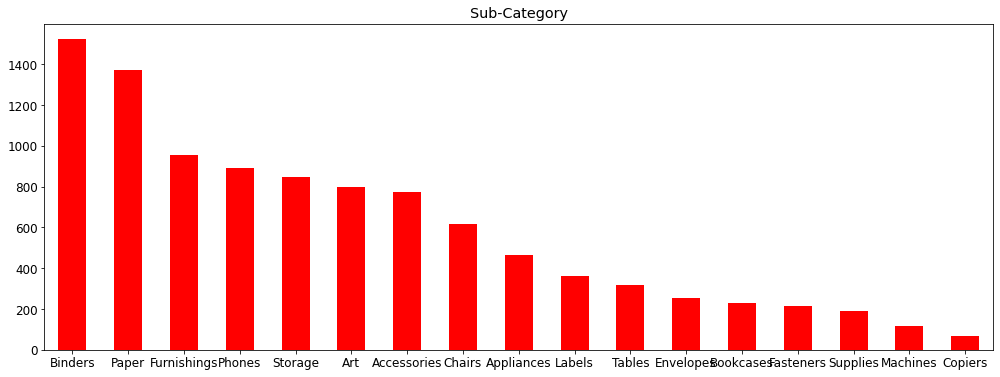

In [ ]:
# Column (Sub-Category)
plt.figure(figsize=(17,6))
store['Sub-Category'].value_counts().plot(kind='bar',color='red',rot=0)
plt.title('Sub-Category')

Sub-category yang banyak dipesan adalah Binders

#### **Menampilkan kolom yang termasuk Numerical**

In [ ]:
#mencari numerical variables

numerical = [var for var in store.columns if store[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 6 numerical variables

The numerical variables are : ['Row ID', 'Postal Code', 'Sales', 'Quantity', 'Discount', 'Profit']


<Figure size 432x288 with 0 Axes>

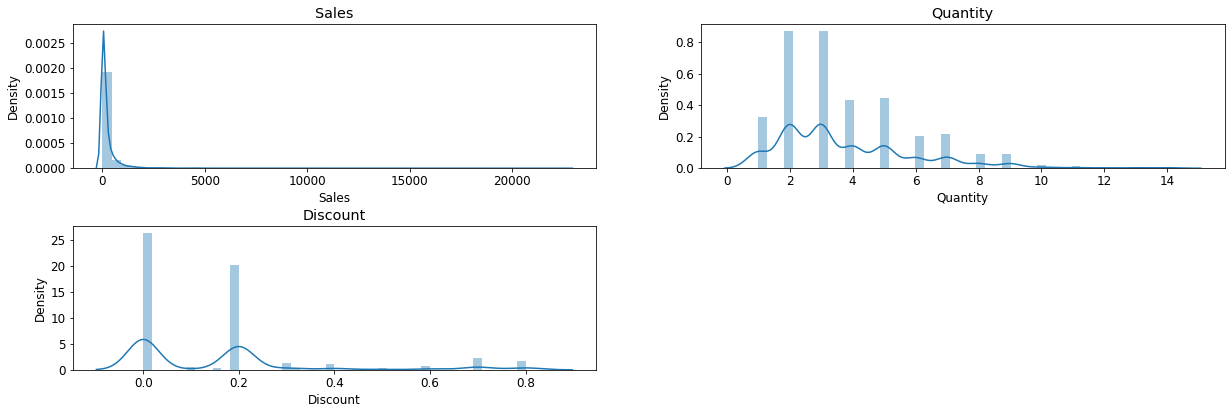

In [ ]:
plt.figure(1)
plt.figure(figsize=(20,6))
plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.2,hspace=0.4)
# Column (Sales)
plt.subplot(221)
sns.distplot(store['Sales'])
plt.title('Sales')
# Column (Quantity)
plt.subplot(222)
sns.distplot(store['Quantity'])
plt.title('Quantity')
# Column (Discount)
plt.subplot(223)
sns.distplot(store['Discount'])
plt.title('Discount')
plt.show()

#### **Membandingkan Target Column dan Categorical Column**

Text(0.5, 1.0, 'Category vs Profit')

<Figure size 432x288 with 0 Axes>

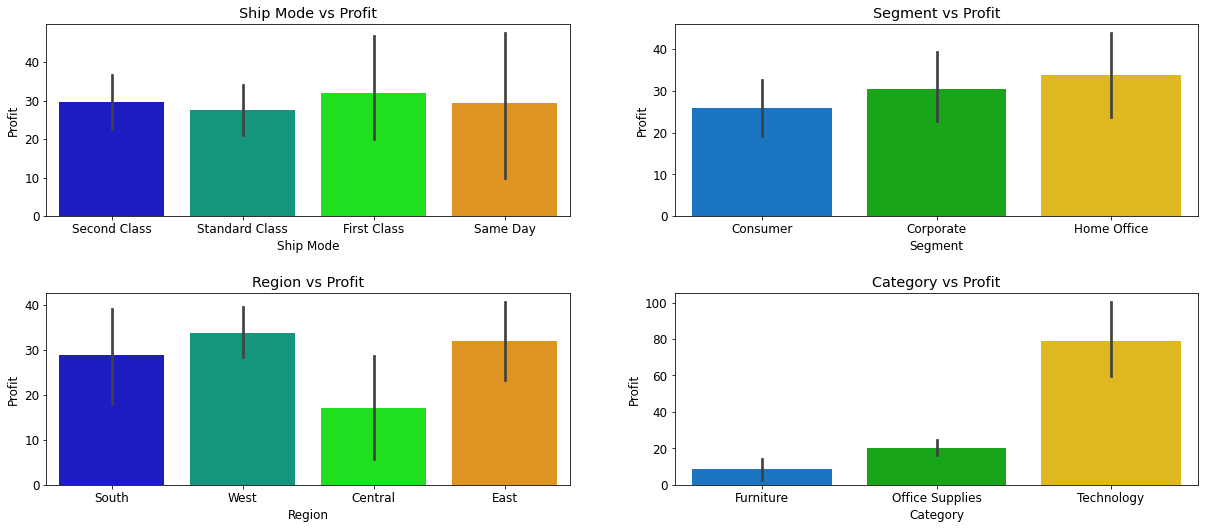

In [ ]:
plt.figure(1)
plt.figure(figsize = (20, 8))
plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.2,hspace=0.4)
# Column (Ship Mode vs Profit)
plt.subplot(221)
sns.barplot(x = store['Ship Mode'], y = store['Profit'], palette = "nipy_spectral")
plt.title('Ship Mode vs Profit')
# Column (Segment vs Profit)
plt.subplot(222)
sns.barplot(x = store['Segment'], y = store['Profit'], palette = "nipy_spectral")
plt.title('Segment vs Profit')
# Column (Region vs Profit)
plt.subplot(223)
sns.barplot(x = store['Region'], y = store['Profit'], palette = "nipy_spectral")
plt.title('Region vs Profit')
# Column (Category vs Profit)
plt.subplot(224)
sns.barplot(x = store['Category'], y = store['Profit'], palette = "nipy_spectral")
plt.title('Category vs Profit')

**Dari plot diatas dapat dilihat**
* Mode pengiriman First Class memiliki keuntungan yang sedikit lebih tinggi daripada mode pengiriman lainnya.
* Pelanggan tipe Home Office menghasilkan lebih banyak keuntungan.
* Keuntungan lebih banyak di wilayah barat.
* Produk teknologi memiliki keuntungan yang tinggi.

Text(0.5, 1.0, 'Sub-Category')

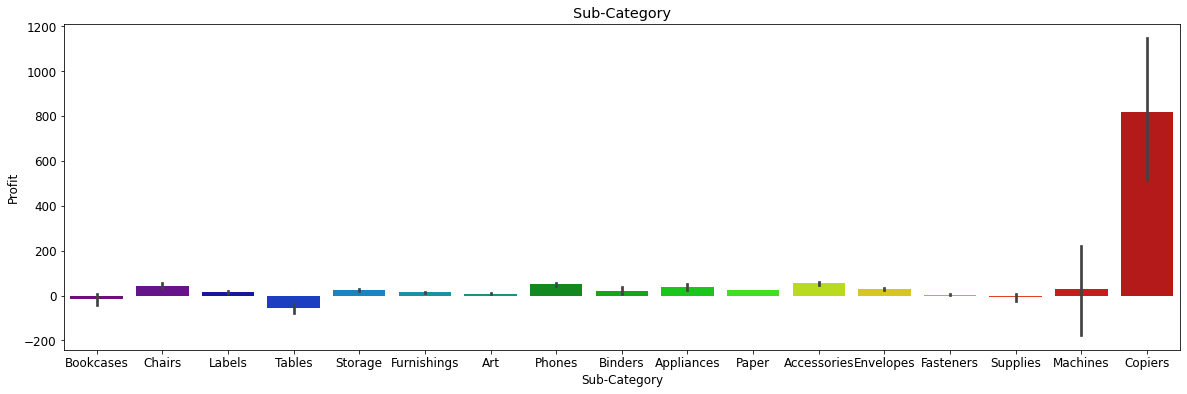

In [ ]:
# Column (Sub-Category vs Profit)
plt.figure(figsize=(20,6))
sns.barplot(x = store['Sub-Category'], y = store['Profit'], palette = "nipy_spectral")
plt.title('Sub-Category')

#### **Membandingkan Target Column dan Numerical Column**

Text(0, 0.5, 'Profit')

<Figure size 432x288 with 0 Axes>

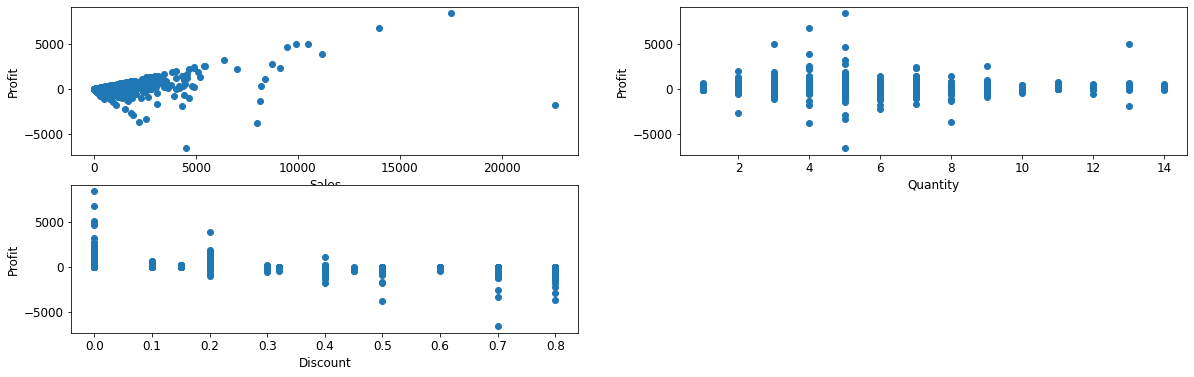

In [ ]:
plt.figure(1)
plt.figure(figsize = (20, 6))
# Column (Sales vs Profit)
plt.subplot(221)
plt.ticklabel_format(style = 'plain')
plt.scatter(store['Sales'], store['Profit'])
plt.xlabel('Sales')
plt.ylabel('Profit')
# Column (Quantity vs Profit)
plt.subplot(222)
plt.ticklabel_format(style = 'plain')
plt.scatter(store['Quantity'], store['Profit'])
plt.xlabel('Quantity')
plt.ylabel('Profit')
# Column (Discount vs Profit)
plt.subplot(223)
plt.ticklabel_format(style = 'plain')
plt.scatter(store['Discount'], store['Profit'])
plt.xlabel('Discount')
plt.ylabel('Profit')

### Menyikirkan Outliner dengan menggunakan boxplot

In [ ]:
ot_store = store[['Sales','Quantity','Discount','Profit']]
ot_store.head()

,Sales,Quantity,Discount,Profit
0,261.9600,2,0.00,41.9136
1,731.9400,3,0.00,219.5820
2,14.6200,2,0.00,6.8714
3,957.5775,5,0.45,-383.0310
4,22.3680,2,0.20,2.5164


In [ ]:
fitted_data1, fitted_lambda = stats.boxcox(ot_store['Sales'])
store['Sales']=fitted_data1
fitted_data2, fitted_lambda = stats.boxcox(ot_store['Quantity'])
store['Quantity']=fitted_data2

<Figure size 432x288 with 0 Axes>

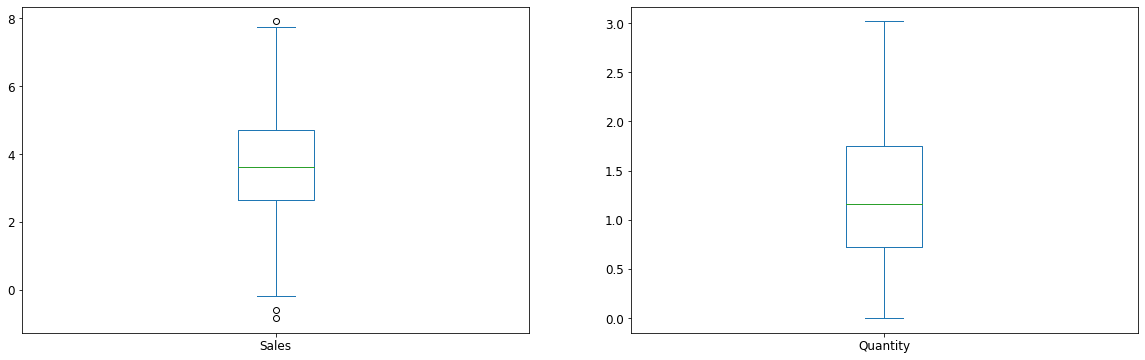

In [ ]:
plt.figure(1)
plt.figure(figsize = (20, 6))
plt.subplot(121)
store['Sales'].plot(kind='box')
plt.subplot(122)
store['Quantity'].plot(kind='box')

## **Model Klasifikasi**

#### **Kolom target yaitu Output_Profit yang dijadikan sebagai model klasifikasi**

In [ ]:
#Menampilkan jumlah pembagian kolom profit
unique, counts = np.unique(p, return_counts=True)
dict(zip(unique, counts))

{'Gain': 8058, 'Loss': 1871, 'Nil': 65}

In [ ]:
store['Output_Profit']=p

In [ ]:
store = store.drop(['Profit'],axis=1)

In [ ]:
store.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Output_Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,4.866793,0.717567,0.00,Gain
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",5.627292,1.160800,0.00,Gain
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,2.511953,0.717567,0.00,Gain
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,5.819876,1.745231,0.45,Loss
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,2.880434,0.717567,0.20,Gain


In [ ]:
x = store

In [ ]:
#Mengganti kolom menjadi numerik
x1 = x.select_dtypes('O')

for col in x1.columns:
    lb = LabelEncoder()
    x[col] = lb.fit_transform(x1[col].values)
x.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Output_Profit
0,1,2500,304,219,2,143,166,0,0,194,...,42420,2,12,0,4,386,4.866793,0.717567,0.00,0
1,2,2500,304,219,2,143,166,0,0,194,...,42420,2,55,0,5,839,5.627292,1.160800,0.00,0
2,3,2296,835,906,2,237,201,1,0,266,...,90036,3,946,1,10,1433,2.511953,0.717567,0.00,0
3,4,4372,93,128,3,705,687,0,0,153,...,33311,2,319,0,16,366,5.819876,1.745231,0.45,1
4,5,4372,93,128,3,705,687,0,0,153,...,33311,2,1316,1,14,573,2.880434,0.717567,0.20,0


In [ ]:
#Melakukan split data
x = store.drop(['Output_Profit'],axis=1)
y = store['Output_Profit']
x_train, x_test, y_train, y_test = train_test_split(x, y)

### **Naive Bayes Classifier**

######Melakukan Data Training

In [ ]:
x_train.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount
7619,7620,3826,153,173,0,393,375,1,0,266,3,90032,3,1832,2,13,782,3.853906,1.745231,0.2
5585,5586,2920,286,431,3,782,779,2,0,329,30,10011,1,1725,2,13,1227,5.414381,1.160800,0.0
3417,3418,1487,677,802,3,744,762,2,0,24,4,80013,3,457,1,1,294,3.442597,1.745231,0.2
7563,7564,3947,179,200,0,627,651,2,0,120,4,80219,3,1505,2,0,1024,3.756522,0.717567,0.2
4496,4497,3056,858,936,3,136,176,0,0,266,3,90032,3,1150,1,12,1717,3.348038,1.961109,0.0


In [ ]:
#Menghitung jumlah kolom x train
x_train.shape

(7495, 20)

In [ ]:
y_train.head(5)

7619    0
5585    0
3417    0
7563    0
4496    0
Name: Output_Profit, dtype: int64

In [ ]:
#Menghitung jumlah kolom y train
y_train.shape

(7495,)

In [ ]:
x_test.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount
6077,6078,2496,1130,1324,3,591,586,0,0,329,30,10011,1,1558,2,0,1077,3.859732,0.717567,0.0
6620,6621,4998,10,29,2,164,137,1,0,464,23,65807,0,1442,1,15,1043,6.829165,1.745231,0.0
3300,3301,4336,229,264,3,172,128,0,0,374,36,19140,1,1398,1,14,1381,3.906415,0.000000,0.2
1888,1889,517,131,143,0,738,765,0,0,147,33,45014,1,468,1,1,662,4.274241,1.486283,0.2
8297,8298,4473,1011,996,3,658,649,1,0,74,31,28205,2,274,0,9,1486,1.533605,0.717567,0.2


In [ ]:
#Menghitung jumlah kolom x test
x_test.shape

(2499, 20)

In [ ]:
#Masukan model naive bayes
gnb = GaussianNB()

gnb.fit(x_train, y_train)

GaussianNB()

######Melakukan Prediksi

In [ ]:
y_pred = gnb.predict(x_test)

y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
#Menampilkan hasil skor akurasi model
print('Model accuracy score: {0:0.2f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.84


Di sini, y_test adalah label kelas sebenarnya dan y_pred adalah label kelas yang diprediksi dalam set pengujian.

In [ ]:
#Membandingkan accuracy dari train-set and test-set

y_pred_train = gnb.predict(x_train)

y_pred_train

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
#Menampilkan perbandingan akurasi
print('Training set score: {:.4f}'.format(gnb.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(gnb.score(x_test, y_test)))

Training set score: 0.8319
Test set score: 0.8351


######Confusion Matrix

In [ ]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[1981   33    0]
 [ 365  106    0]
 [  14    0    0]]

True Positives(TP) =  1981

True Negatives(TN) =  106

False Positives(FP) =  33

False Negatives(FN) =  365


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.98      0.91      2014
           1       0.76      0.23      0.35       471
           2       0.00      0.00      0.00        14

    accuracy                           0.84      2499
   macro avg       0.53      0.40      0.42      2499
weighted avg       0.82      0.84      0.80      2499



######Menghitung Probabilitas

In [ ]:
y_pred_prob = gnb.predict_proba(x_test)

y_pred_prob

array([[9.28805273e-01, 7.06573836e-02, 5.37343096e-04],
       [7.35579441e-01, 2.45001314e-01, 1.94192442e-02],
       [8.91947850e-01, 1.00470595e-01, 7.58155559e-03],
       ...,
       [9.29384930e-01, 6.80100820e-02, 2.60498796e-03],
       [9.69882090e-01, 2.74118135e-02, 2.70609607e-03],
       [9.02769793e-01, 9.54532488e-02, 1.77695778e-03]])

In [ ]:
#Menampilkan prediksi untuk kelas 0 / probability dari profit > 0

gnb.predict_proba(x_test)[0:10, 0]

array([0.92880527, 0.73557944, 0.89194785, 0.56771256, 0.55777598,
       0.92728024, 0.8804964 , 0.94687112, 0.9086795 , 0.93952983])

In [ ]:
y_pred1 = gnb.predict_proba(x_test)[:, 0]

Text(0, 0.5, 'Frequency')

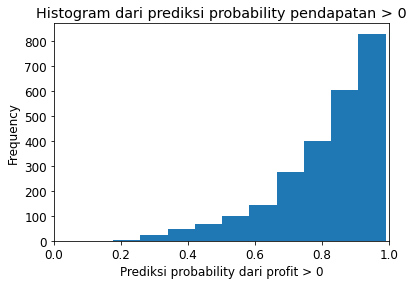

In [ ]:
#Plot histogram dari prediksi probability


#Atur ukuran 
plt.rcParams['font.size'] = 12


#Buat plot histogram dengan 10 bins
plt.hist(y_pred1, bins = 10)


#Atur judul
plt.title('Histogram dari prediksi probability pendapatan > 0')


#Atur limit x-axis
plt.xlim(0,1)


#Atur judul
plt.xlabel('Prediksi probability dari profit > 0')
plt.ylabel('Frequency')

######Pengujian dengan K-Fold Cross Validation

In [ ]:
#Menampilkan skor akurasi 10-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(gnb, x_train, y_train, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.82666667 0.83466667 0.828      0.82133333 0.82266667 0.8317757
 0.83978638 0.83711615 0.83845127 0.82643525]


In [ ]:
#Menghitung rata-rata skor cross-validation

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.8307


### **Random Forest Classifier Model**

In [ ]:
cm_rfc = Pipeline([('std_scaler', StandardScaler()),('rfc_classifier',RandomForestClassifier(n_estimators=150,max_depth=7,random_state=5))])

In [ ]:
cm_rfc.fit(x_train, y_train)

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('rfc_classifier',
                 RandomForestClassifier(max_depth=7, n_estimators=150,
                                        random_state=5))])

In [ ]:
cm_rfc.score(x_train,y_train), cm_rfc.score(x_test,y_test)

(0.9411607738492328, 0.936374549819928)

## **Kesimpulan Perbandingan**

In [ ]:
#Membuat kolom perbandingan
models = ['Naive Bayes','Random Forest']
conclusion = pd.DataFrame(models,columns=['Models'])

In [ ]:
m = [gnb,cm_rfc]
train = []
test = []
for i in m:
    train.append(i.score(x_train,y_train))
    test.append(i.score(x_test,y_test))

In [ ]:
conclusion['Train_score']=train
conclusion['Test_score']=test

In [ ]:
#Menampilkan perbandingan hasil akurasi dari model naive bayes dan random forest
conclusion.style.highlight_max()

,Models,Train_score,Test_score
0,Naive Bayes,0.831888,0.835134
1,Random Forest,0.941161,0.936375
